In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as ur
from bbmag import bb_abmag_fluence
from image_utils import construct_image
from tdsat_sensitivity import bgd_sky_qe_rate
from tdsat_telescope import load_telescope_parameters

# Part 1, simulate observed image
    
# Define telescope parameters
diameter, qe, psf_fwhm, pixel_size, efficiency = load_telescope_parameters(11)
duet_band1 = [193,233] * ur.nm
duet_band2 = [260,320] * ur.nm
read_noise = 3.
light = True

point_drift = 1 * ur.arcsec # To be added to the PSF in quadrature
point_jitter = 5 * ur.arcsec
psf_fwhm = (psf_fwhm**2 + point_drift**2 + point_jitter**2)**0.5 # [4,6,10] * ur.arcsec  
print('Effective PSF FWHM {}'.format(psf_fwhm))

# Stuff from DUET AB Mag Limit On-Axis
trans_eff = (0.975)**8
area = np.pi * (diameter*0.5)**2
area_onaxis = np.pi * (0.5*24.2*ur.cm)**2
efficiency = area_onaxis / area

# Define image simulation parameters
exposure = 300 * ur.s
frame = np.array((30,30)) # Dimensions of the image I'm simulating in DUET pixels (30x30 ~ 3x3 arcmin)

Telescope Configuration 11
Name: Small Focal Plane CMOS
Entrance Pupil diameter 26.0 cm
Optical Efficiency 0.7893639053254439
PSF FWHM 4.288 arcsec
Pixel size 6.4 arcsec
Effective Aperture 23.1 cm
Effective Area 419.09631397051237 cm2
Effective PSF FWHM 6.6623527375845235 arcsec


In [2]:
# Define source
bbtemp = 20000 * ur.K
swiftmag = 20 * ur.ABmag

src_fluence1, src_fluence2 = bb_abmag_fluence(bbtemp=bbtemp, swiftmag=swiftmag, light=light)
print("Source fluences: {}, {}".format(src_fluence1,src_fluence2))
src_rate1 = trans_eff * efficiency * area * src_fluence1
print("Source rate (band 1): {}".format(src_rate1))

# Define galaxy
#galaxy = 'spiral'
#gal_params = None
galaxy = 'custom'
gal_params = {'amplitude': 0.01, 'r_eff': 20, 'n': 1, 'theta': 0, 'ellip': 0.5, 'x_0': 30, 'y_0': 0}

# Define sky background rate
sky_rate = bgd_sky_qe_rate(low_zodi=True, band=duet_band1, diameter=diameter, pixel_size=pixel_size,\
                           real_red=True, light=light)
print("Sky background rate: {}".format(sky_rate))

Source fluences: 0.0050895688410466855 1 / (cm2 s), 0.004801805868051518 1 / (cm2 s)
Source rate (band 1): 1.9117827202009057 1 / s
Sky background rate: 0.04292595884789351 1 / s


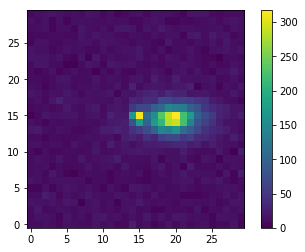

In [3]:
# Construct the simulated image
image = construct_image(frame, pixel_size, exposure, psf_fwhm, read_noise, \
                        gal_type=galaxy, gal_params=gal_params, source=src_rate1, sky_rate=sky_rate)

plt.imshow(image, cmap='viridis', aspect=1, origin='lower')
plt.colorbar()

custom {'amplitude': 0.01, 'r_eff': 20, 'n': 1, 'theta': 0, 'ellip': 0.5, 'x_0': 30, 'y_0': 0}


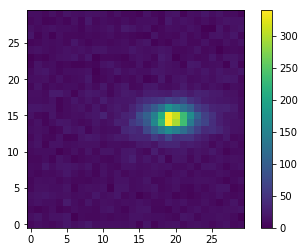

In [4]:
# Part 2, simulate reference image, without source, 5 exposures (to-do)

ref_image = construct_image(frame, pixel_size, exposure, psf_fwhm, read_noise, \
                            gal_type=galaxy, gal_params=gal_params, source=None, sky_rate=sky_rate)

plt.imshow(ref_image, cmap='viridis', aspect=1, origin='lower')
plt.colorbar()

In [1]:
from Difference_Imaging.diff_image import py_zogy

# Part 3, take difference image (probably doesn't need its own function, most of it is in py)
# Inputs: reference image, simulated image

# Perform difference imaging

# Return difference image, PSF, plot here

In [1]:
# Part 4, photometry 

# Perform aperture photometry on the difference image, get flux difference and error

# Perform aperture/PSF photometry on the reference image, if applicable. Otherwise get flux upper limit?

# Generate a resulting flux ratio and magnitude difference

# Compare the photometry results with the input parameters